# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
!pip install citipy

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

575

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Starting URL for weather Map API call
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={api_key}"

#list of city data
city_data = []


 #print to logger
print("Beginning Data Retrieval")
print("-"*15)

# #Creat counters
record_count = 1
set_count = 1
# #loop throug all cities in our list
for index, city in enumerate(cities):
    # Group citiese in sets of 50 for logging purpose
    if (index % 50 == 0 and index >=50):
        set_count +=1
        record_count = 0
    #Creat endpoint URL with each city 
    city_url = url + "&q="+ city 
        
    # log the url record and set number
    print(f"Processing Record{record_count} of Set {set_count} | {city}")
    record_count += 1
        
    # Run an API request for each of the cities
    try:
    #Parse the JSON and retrieve-data
        city_weather=requests.get(city_url).json()
        print(city_weather)
        # Extract out max temp humidy and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_max_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather ["dt"]
        
            
            #Append the city info into city data list
        city_data.append({
                            "City":city,
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity":city_max_humidity,
                            "Cloudiness":city_clouds,
                            "Wind Speed":city_wind,
                            "Country":city_country,
                            "Date": city_date,
                
            })
    except:
                print("City no found. Skipping.....")
                pass
    #Indicate that Data Loading is complete
                print("--------------------")
                print("Data Retrieval Complete")
                print("-----------------------")


Beginning Data Retrieval
---------------
Processing Record1 of Set 1 | jamestown
{'coord': {'lon': -79.24, 'lat': 42.1}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}, {'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 35.01, 'feels_like': 29.46, 'temp_min': 30.99, 'temp_max': 39, 'pressure': 999, 'humidity': 93}, 'visibility': 6437, 'wind': {'speed': 3.83, 'deg': 231}, 'rain': {'1h': 1.27}, 'clouds': {'all': 90}, 'dt': 1582771590, 'sys': {'type': 1, 'id': 3418, 'country': 'US', 'sunrise': 1582718270, 'sunset': 1582758143}, 'timezone': -18000, 'id': 5122534, 'name': 'Jamestown', 'cod': 200}
Processing Record2 of Set 1 | sungaipenuh
{'coord': {'lon': 101.38, 'lat': -2.08}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 73.15, 'feels_like': 

{'coord': {'lon': -120.46, 'lat': 34.64}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 60.17, 'feels_like': 55.6, 'temp_min': 57, 'temp_max': 62.6, 'pressure': 1023, 'humidity': 50}, 'visibility': 16093, 'wind': {'speed': 4.7, 'deg': 220}, 'clouds': {'all': 1}, 'dt': 1582771605, 'sys': {'type': 1, 'id': 4558, 'country': 'US', 'sunrise': 1582727724, 'sunset': 1582768472}, 'timezone': -28800, 'id': 5367788, 'name': 'Lompoc', 'cod': 200}
Processing Record18 of Set 1 | severo-kurilsk
{'coord': {'lon': 156.12, 'lat': 50.68}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 26.22, 'feels_like': 18.91, 'temp_min': 26.22, 'temp_max': 26.22, 'pressure': 1006, 'humidity': 92, 'sea_level': 1006, 'grnd_level': 967}, 'wind': {'speed': 4.88, 'deg': 281}, 'snow': {'3h': 0.25}, 'clouds': {'all': 100}, 'dt': 1582771889, 'sys': {'country': 'RU', 'sunrise

{'coord': {'lon': -156.79, 'lat': 71.29}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': -34.6, 'feels_like': -44.93, 'temp_min': -34.6, 'temp_max': -34.6, 'pressure': 1022, 'humidity': 97}, 'visibility': 16093, 'wind': {'speed': 5.82, 'deg': 220}, 'clouds': {'all': 1}, 'dt': 1582771802, 'sys': {'type': 1, 'id': 7649, 'country': 'US', 'sunrise': 1582741010, 'sunset': 1582772622}, 'timezone': -32400, 'id': 5880054, 'name': 'Barrow', 'cod': 200}
Processing Record35 of Set 1 | punta arenas
{'coord': {'lon': -70.92, 'lat': -53.15}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 48.11, 'feels_like': 25.63, 'temp_min': 48, 'temp_max': 48.2, 'pressure': 998, 'humidity': 70}, 'visibility': 10000, 'wind': {'speed': 35.57, 'deg': 270}, 'clouds': {'all': 20}, 'dt': 1582771892, 'sys': {'type': 1, 'id': 8487, 'country': 'CL', 'sunrise': 1582711389

{'coord': {'lon': 115.33, 'lat': -33.65}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 71.01, 'feels_like': 63.57, 'temp_min': 71.01, 'temp_max': 71.01, 'pressure': 1008, 'humidity': 54}, 'wind': {'speed': 15.12, 'deg': 75}, 'rain': {'3h': 1.25}, 'clouds': {'all': 100}, 'dt': 1582771667, 'sys': {'type': 3, 'id': 2011706, 'country': 'AU', 'sunrise': 1582754664, 'sunset': 1582801146}, 'timezone': 28800, 'id': 2075265, 'name': 'Busselton', 'cod': 200}
Processing Record1 of Set 2 | mukhen
{'coord': {'lon': 136.1, 'lat': 48.1}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 21.51, 'feels_like': 13.78, 'temp_min': 21.51, 'temp_max': 21.51, 'pressure': 1025, 'humidity': 79, 'sea_level': 1025, 'grnd_level': 1002}, 'wind': {'speed': 4.23, 'deg': 238}, 'clouds': {'all': 100}, 'dt': 1582771896, 'sys': {'country': 'RU', 'sunrise': 15827533

{'coord': {'lon': -69.36, 'lat': 77.48}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -14.04, 'feels_like': -23.12, 'temp_min': -14.04, 'temp_max': -14.04, 'pressure': 1015, 'humidity': 58, 'sea_level': 1015, 'grnd_level': 973}, 'wind': {'speed': 3.8, 'deg': 75}, 'clouds': {'all': 100}, 'dt': 1582771899, 'sys': {'country': 'GL', 'sunrise': 1582723663, 'sunset': 1582748008}, 'timezone': -14400, 'id': 3831208, 'name': 'Qaanaaq', 'cod': 200}
Processing Record16 of Set 2 | evensk
{'coord': {'lon': 159.23, 'lat': 61.95}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 11.75, 'feels_like': 0.28, 'temp_min': 11.75, 'temp_max': 11.75, 'pressure': 1021, 'humidity': 70, 'sea_level': 1021, 'grnd_level': 997}, 'wind': {'speed': 9.48, 'deg': 348}, 'clouds': {'all': 100}, 'dt': 1582771900, 'sys': {'country': 'RU', 'sunrise': 1582749334

{'coord': {'lon': -94.43, 'lat': 49.82}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 9.5, 'feels_like': 1.17, 'temp_min': 8.6, 'temp_max': 10.4, 'pressure': 1023, 'humidity': 55}, 'visibility': 24140, 'wind': {'speed': 3.36, 'deg': 40}, 'clouds': {'all': 75}, 'dt': 1582771904, 'sys': {'type': 1, 'id': 894, 'country': 'CA', 'sunrise': 1582722475, 'sunset': 1582761228}, 'timezone': -21600, 'id': 5991056, 'name': 'Kenora', 'cod': 200}
Processing Record34 of Set 2 | carnarvon
{'coord': {'lon': 113.63, 'lat': -24.87}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 82.4, 'feels_like': 82.96, 'temp_min': 82.4, 'temp_max': 82.4, 'pressure': 1007, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 17.22, 'deg': 220}, 'clouds': {'all': 40}, 'dt': 1582771904, 'sys': {'type': 1, 'id': 9505, 'country': 'AU', 'sunrise': 158275551

{'cod': '404', 'message': 'city not found'}
City no found. Skipping.....
--------------------
Data Retrieval Complete
-----------------------
Processing Record1 of Set 3 | marcona
{'cod': '404', 'message': 'city not found'}
City no found. Skipping.....
--------------------
Data Retrieval Complete
-----------------------
Processing Record2 of Set 3 | iqaluit
{'coord': {'lon': -68.51, 'lat': 63.75}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -27.2, 'feels_like': -37.53, 'temp_min': -27.4, 'temp_max': -27, 'pressure': 1028, 'humidity': 67}, 'visibility': 24140, 'wind': {'speed': 5.82, 'deg': 340}, 'clouds': {'all': 5}, 'dt': 1582771908, 'sys': {'type': 1, 'id': 797, 'country': 'CA', 'sunrise': 1582717969, 'sunset': 1582753294}, 'timezone': -18000, 'id': 5983720, 'name': 'Iqaluit', 'cod': 200}
Processing Record3 of Set 3 | chuy
{'coord': {'lon': -53.46, 'lat': -33.7}, 'weather': [{'id': 800, 'main': 'Clear', 'd

{'cod': '404', 'message': 'city not found'}
City no found. Skipping.....
--------------------
Data Retrieval Complete
-----------------------
Processing Record17 of Set 3 | palauig
{'coord': {'lon': 119.9, 'lat': 15.44}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 87.46, 'feels_like': 90.41, 'temp_min': 87.46, 'temp_max': 87.46, 'pressure': 1015, 'humidity': 47, 'sea_level': 1015, 'grnd_level': 981}, 'wind': {'speed': 3.91, 'deg': 258}, 'clouds': {'all': 84}, 'dt': 1582771911, 'sys': {'country': 'PH', 'sunrise': 1582755578, 'sunset': 1582798038}, 'timezone': 28800, 'id': 1696188, 'name': 'Palauig', 'cod': 200}
Processing Record18 of Set 3 | kruisfontein
{'coord': {'lon': 24.73, 'lat': -34}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 62.83, 'feels_like': 60.93, 'temp_min': 62.83, 'temp_max': 62.83, 'pressure': 1014, 'h

{'coord': {'lon': -53.11, 'lat': 48.65}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 26.01, 'feels_like': 18.5, 'temp_min': 26.01, 'temp_max': 26.01, 'pressure': 1017, 'humidity': 89}, 'wind': {'speed': 5.01, 'deg': 321, 'gust': 8.99}, 'snow': {'3h': 0.13}, 'clouds': {'all': 96}, 'dt': 1582771914, 'sys': {'type': 3, 'id': 2011050, 'country': 'CA', 'sunrise': 1582712475, 'sunset': 1582751396}, 'timezone': -12600, 'id': 5905393, 'name': 'Bonavista', 'cod': 200}
Processing Record33 of Set 3 | codrington
{'coord': {'lon': 141.97, 'lat': -38.27}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 60.51, 'feels_like': 46.51, 'temp_min': 60.51, 'temp_max': 60.51, 'pressure': 1011, 'humidity': 76, 'sea_level': 1011, 'grnd_level': 1012}, 'wind': {'speed': 26.49, 'deg': 274}, 'rain': {'3h': 0.31}, 'clouds': {'all': 92}, 'dt': 1582771914, 'sys': {'

{'coord': {'lon': -66.34, 'lat': -33.3}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 72.01, 'feels_like': 63.5, 'temp_min': 72.01, 'temp_max': 72.01, 'pressure': 1014, 'humidity': 27, 'sea_level': 1014, 'grnd_level': 960}, 'wind': {'speed': 9.95, 'deg': 49}, 'clouds': {'all': 0}, 'dt': 1582771917, 'sys': {'country': 'AR', 'sunrise': 1582711859, 'sunset': 1582758362}, 'timezone': -10800, 'id': 3837056, 'name': 'San Luis', 'cod': 200}
Processing Record0 of Set 4 | tuatapere
{'coord': {'lon': 167.68, 'lat': -46.13}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 63, 'feels_like': 53.11, 'temp_min': 63, 'temp_max': 63, 'pressure': 1005, 'humidity': 64}, 'wind': {'speed': 18.01, 'deg': 225, 'gust': 28.01}, 'clouds': {'all': 21}, 'dt': 1582771917, 'sys': {'type': 3, 'id': 2008959, 'country': 'NZ', 'sunrise': 1582741244, 'sunset': 1582789

{'coord': {'lon': -75.46, 'lat': 43.21}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 39.31, 'feels_like': 29.43, 'temp_min': 37, 'temp_max': 43, 'pressure': 1006, 'humidity': 93}, 'visibility': 16093, 'wind': {'speed': 12.75, 'deg': 130, 'gust': 21.92}, 'clouds': {'all': 90}, 'dt': 1582771734, 'sys': {'type': 1, 'id': 5681, 'country': 'US', 'sunrise': 1582717436, 'sunset': 1582757162}, 'timezone': -18000, 'id': 5134295, 'name': 'Rome', 'cod': 200}
Processing Record16 of Set 4 | altay
{'coord': {'lon': 88.12, 'lat': 47.87}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 26.62, 'feels_like': 19.58, 'temp_min': 26.62, 'temp_max': 26.62, 'pressure': 1019, 'humidity': 74, 'sea_level': 1019, 'grnd_level': 827}, 'wind': {'speed': 3.53, 'deg': 69}, 'clouds': {'all': 100}, 'dt': 1582771922, 'sys': {'country': 'CN', 'sunrise': 15

{'coord': {'lon': 150.87, 'lat': -34.68}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 74.3, 'feels_like': 68.27, 'temp_min': 71.01, 'temp_max': 79, 'pressure': 1009, 'humidity': 56}, 'visibility': 10000, 'wind': {'speed': 14.99, 'deg': 40}, 'clouds': {'all': 40}, 'dt': 1582771925, 'sys': {'type': 1, 'id': 9594, 'country': 'AU', 'sunrise': 1582746071, 'sunset': 1582792682}, 'timezone': 39600, 'id': 2161515, 'name': 'Kiama', 'cod': 200}
Processing Record33 of Set 4 | nikolskoye
{'coord': {'lon': 30.79, 'lat': 59.7}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 24.39, 'feels_like': 15.35, 'temp_min': 21, 'temp_max': 26.6, 'pressure': 997, 'humidity': 73}, 'visibility': 10000, 'wind': {'speed': 6.71, 'deg': 40}, 'clouds': {'all': 70}, 'dt': 1582771926, 'sys': {'type': 1, 'id': 8926, 'country': 'RU', 'sunrise': 1582779769, 

{'coord': {'lon': 92.75, 'lat': 11.67}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 81.75, 'feels_like': 82.26, 'temp_min': 81.75, 'temp_max': 81.75, 'pressure': 1013, 'humidity': 71, 'sea_level': 1013, 'grnd_level': 1013}, 'wind': {'speed': 13.94, 'deg': 37}, 'clouds': {'all': 99}, 'dt': 1582771929, 'sys': {'country': 'IN', 'sunrise': 1582761949, 'sunset': 1582804698}, 'timezone': 19800, 'id': 1259385, 'name': 'Port Blair', 'cod': 200}
Processing Record0 of Set 5 | saskylakh
{'coord': {'lon': 114.08, 'lat': 71.92}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 10.83, 'feels_like': -4.45, 'temp_min': 10.83, 'temp_max': 10.83, 'pressure': 1016, 'humidity': 87, 'sea_level': 1016, 'grnd_level': 1005}, 'wind': {'speed': 16.62, 'deg': 264}, 'clouds': {'all': 0}, 'dt': 1582771929, 'sys': {'country': 'RU', 'sunrise': 1582762556, 'su

{'coord': {'lon': 103.77, 'lat': 16.33}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 78.8, 'feels_like': 77.95, 'temp_min': 78.8, 'temp_max': 78.8, 'pressure': 1015, 'humidity': 61}, 'visibility': 10000, 'wind': {'speed': 10.29, 'deg': 80}, 'clouds': {'all': 51}, 'dt': 1582771932, 'sys': {'type': 1, 'id': 9300, 'country': 'TH', 'sunrise': 1582759482, 'sunset': 1582801876}, 'timezone': 25200, 'id': 1607635, 'name': 'Pho Chai', 'cod': 200}
Processing Record16 of Set 5 | luderitz
{'coord': {'lon': 15.16, 'lat': -26.65}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 62.6, 'feels_like': 62.22, 'temp_min': 62.6, 'temp_max': 62.6, 'pressure': 1011, 'humidity': 88}, 'wind': {'speed': 5.82, 'deg': 180}, 'clouds': {'all': 0}, 'dt': 1582771932, 'sys': {'type': 1, 'id': 2260, 'country': 'NA', 'sunrise': 1582779077, 'sunset': 1582824809}, '

{'coord': {'lon': 127.87, 'lat': 26.35}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 69.71, 'feels_like': 61.03, 'temp_min': 68, 'temp_max': 71.6, 'pressure': 1022, 'humidity': 56}, 'visibility': 10000, 'wind': {'speed': 17.22, 'deg': 20}, 'clouds': {'all': 75}, 'dt': 1582771935, 'sys': {'type': 1, 'id': 8137, 'country': 'JP', 'sunrise': 1582754111, 'sunset': 1582795681}, 'timezone': 32400, 'id': 1863495, 'name': 'Gushikawa', 'cod': 200}
Processing Record33 of Set 5 | ati
{'coord': {'lon': 18.34, 'lat': 13.22}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 69.78, 'feels_like': 59.97, 'temp_min': 69.78, 'temp_max': 69.78, 'pressure': 1010, 'humidity': 14, 'sea_level': 1010, 'grnd_level': 971}, 'wind': {'speed': 8.3, 'deg': 37}, 'clouds': {'all': 0}, 'dt': 1582771936, 'sys': {'country': 'TD', 'sunrise': 1582779859, 'sunset': 1582

{'coord': {'lon': 39.67, 'lat': -7.91}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 79.74, 'feels_like': 85.41, 'temp_min': 79.74, 'temp_max': 79.74, 'pressure': 1010, 'humidity': 87, 'sea_level': 1010, 'grnd_level': 1010}, 'wind': {'speed': 8.86, 'deg': 260}, 'rain': {'3h': 1.81}, 'clouds': {'all': 100}, 'dt': 1582771941, 'sys': {'country': 'TZ', 'sunrise': 1582773969, 'sunset': 1582818153}, 'timezone': 10800, 'id': 157429, 'name': 'Kilindoni', 'cod': 200}
Processing Record49 of Set 5 | mumbwa
{'coord': {'lon': 27.06, 'lat': -14.98}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 61.43, 'feels_like': 61.79, 'temp_min': 61.43, 'temp_max': 61.43, 'pressure': 1013, 'humidity': 97, 'sea_level': 1013, 'grnd_level': 881}, 'wind': {'speed': 5.55, 'deg': 50}, 'clouds': {'all': 40}, 'dt': 1582771783, 'sys': {'country': 'ZM', 'sunrise

{'coord': {'lon': -79.82, 'lat': 35.7}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 49.28, 'feels_like': 39.58, 'temp_min': 44.01, 'temp_max': 57.2, 'pressure': 1007, 'humidity': 66}, 'visibility': 16093, 'wind': {'speed': 12.75, 'deg': 310, 'gust': 20.8}, 'rain': {'1h': 0.76}, 'clouds': {'all': 90}, 'dt': 1582771945, 'sys': {'type': 1, 'id': 4332, 'country': 'US', 'sunrise': 1582718035, 'sunset': 1582758656}, 'timezone': -18000, 'id': 4487127, 'name': 'Randolph', 'cod': 200}
Processing Record16 of Set 6 | sabinas hidalgo
{'coord': {'lon': -100.17, 'lat': 26.5}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 48.29, 'feels_like': 39.34, 'temp_min': 48.29, 'temp_max': 48.29, 'pressure': 1033, 'humidity': 30, 'sea_level': 1033, 'grnd_level': 998}, 'wind': {'speed': 6.73, 'deg': 349}, 'clouds': {'all': 0}, 'dt': 1582771945, 'sys': {'coun

{'coord': {'lon': 3.2, 'lat': 6.81}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 82.4, 'feels_like': 92.52, 'temp_min': 82.4, 'temp_max': 82.4, 'pressure': 1010, 'humidity': 83}, 'visibility': 8000, 'wind': {'speed': 2.24}, 'clouds': {'all': 20}, 'dt': 1582771948, 'sys': {'type': 1, 'id': 1185, 'country': 'NG', 'sunrise': 1582783257, 'sunset': 1582826369}, 'timezone': 3600, 'id': 2338876, 'name': 'Ifo', 'cod': 200}
Processing Record31 of Set 6 | vila velha
{'coord': {'lon': -40.29, 'lat': -20.33}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 80.8, 'feels_like': 84.16, 'temp_min': 80.6, 'temp_max': 81, 'pressure': 1010, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 20}, 'clouds': {'all': 20}, 'dt': 1582771948, 'sys': {'type': 1, 'id': 8474, 'country': 'BR', 'sunrise': 1582706248, 'sunset': 1582751471}, 'ti

{'coord': {'lon': 122.5, 'lat': -3.94}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 85.96, 'feels_like': 92.16, 'temp_min': 85.96, 'temp_max': 85.96, 'pressure': 1009, 'humidity': 70, 'sea_level': 1009, 'grnd_level': 998}, 'wind': {'speed': 7.4, 'deg': 36}, 'rain': {'3h': 0.38}, 'clouds': {'all': 100}, 'dt': 1582771951, 'sys': {'country': 'ID', 'sunrise': 1582754238, 'sunset': 1582798131}, 'timezone': 28800, 'id': 1640344, 'name': 'Kendari', 'cod': 200}
Processing Record47 of Set 6 | fortuna
{'coord': {'lon': -124.16, 'lat': 40.6}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 49.69, 'feels_like': 45.05, 'temp_min': 48.99, 'temp_max': 50, 'pressure': 1028, 'humidity': 81}, 'visibility': 12874, 'wind': {'speed': 5.82, 'deg': 340}, 'clouds': {'all': 1}, 'dt': 1582771951, 'sys': {'type': 1, 'id': 3217, 'country': 'US', 'sunrise': 15827

{'coord': {'lon': 13.55, 'lat': -4.15}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 73.96, 'feels_like': 82.15, 'temp_min': 73.96, 'temp_max': 73.96, 'pressure': 1010, 'humidity': 97, 'sea_level': 1010, 'grnd_level': 975}, 'wind': {'speed': 1.88, 'deg': 10}, 'rain': {'3h': 5.94}, 'clouds': {'all': 100}, 'dt': 1582771954, 'sys': {'country': 'CG', 'sunrise': 1582780377, 'sunset': 1582824281}, 'timezone': 3600, 'id': 2257990, 'name': 'Madingou', 'cod': 200}
Processing Record13 of Set 7 | ilo
{'coord': {'lon': -71.34, 'lat': -17.64}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 73.42, 'feels_like': 76.77, 'temp_min': 73.42, 'temp_max': 73.42, 'pressure': 1017, 'humidity': 88, 'sea_level': 1017, 'grnd_level': 1012}, 'wind': {'speed': 7.29, 'deg': 151}, 'clouds': {'all': 40}, 'dt': 1582771938, 'sys': {'country': 'PE', 'sunrise

{'coord': {'lon': 153.1, 'lat': -26.53}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 81.18, 'feels_like': 88.66, 'temp_min': 77, 'temp_max': 86, 'pressure': 1005, 'humidity': 78}, 'wind': {'speed': 3.71, 'deg': 53}, 'rain': {'3h': 1.75}, 'clouds': {'all': 33}, 'dt': 1582771958, 'sys': {'type': 3, 'id': 2031008, 'country': 'AU', 'sunrise': 1582745963, 'sunset': 1582791719}, 'timezone': 36000, 'id': 2170581, 'name': 'Coolum Beach', 'cod': 200}
Processing Record29 of Set 7 | pekan
{'coord': {'lon': 103.4, 'lat': 3.48}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 80.4, 'feels_like': 86.7, 'temp_min': 80.01, 'temp_max': 80.6, 'pressure': 1012, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 340}, 'clouds': {'all': 20}, 'dt': 1582771958, 'sys': {'type': 1, 'id': 9432, 'country': 'MY', 'sunrise': 1582759093, 'sunse

{'coord': {'lon': 140.3, 'lat': 35.13}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 50.31, 'feels_like': 35.02, 'temp_min': 48.99, 'temp_max': 52, 'pressure': 1017, 'humidity': 39}, 'visibility': 10000, 'wind': {'speed': 19.46, 'deg': 350}, 'clouds': {'all': 20}, 'dt': 1582771963, 'sys': {'type': 1, 'id': 8074, 'country': 'JP', 'sunrise': 1582751547, 'sunset': 1582792279}, 'timezone': 32400, 'id': 2112309, 'name': 'Katsuura', 'cod': 200}
Processing Record46 of Set 7 | cabo san lucas
{'coord': {'lon': -109.91, 'lat': 22.89}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 67.53, 'feels_like': 64.78, 'temp_min': 63, 'temp_max': 69.8, 'pressure': 1015, 'humidity': 52}, 'visibility': 12874, 'wind': {'speed': 4.7, 'deg': 170}, 'clouds': {'all': 20}, 'dt': 1582771963, 'sys': {'type': 1, 'id': 7151, 'country': 'MX', 'sunrise': 1582724647

{'cod': '404', 'message': 'city not found'}
City no found. Skipping.....
--------------------
Data Retrieval Complete
-----------------------
Processing Record13 of Set 8 | harper
{'coord': {'lon': -7.72, 'lat': 4.38}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 77.97, 'feels_like': 87.62, 'temp_min': 77.97, 'temp_max': 77.97, 'pressure': 1008, 'humidity': 94, 'sea_level': 1008, 'grnd_level': 1005}, 'wind': {'speed': 2.42, 'deg': 205}, 'clouds': {'all': 0}, 'dt': 1582771967, 'sys': {'country': 'LR', 'sunrise': 1582785789, 'sunset': 1582829077}, 'timezone': 0, 'id': 2276492, 'name': 'Harper', 'cod': 200}
Processing Record14 of Set 8 | kulykiv
{'coord': {'lon': 24.82, 'lat': 50.31}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 35.83, 'feels_like': 26.53, 'temp_min': 35.83, 'temp_max': 35.83, 'pressure': 999, 'humidity': 77, 's

{'coord': {'lon': 13.08, 'lat': 53.37}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 33.98, 'feels_like': 28.38, 'temp_min': 33.01, 'temp_max': 35.01, 'pressure': 999, 'humidity': 84}, 'wind': {'speed': 3, 'deg': 270, 'gust': 5.99}, 'clouds': {'all': 76}, 'dt': 1582771970, 'sys': {'type': 3, 'id': 2000268, 'country': 'DE', 'sunrise': 1582783300, 'sunset': 1582821584}, 'timezone': 3600, 'id': 2864005, 'name': 'Neustrelitz', 'cod': 200}
Processing Record31 of Set 8 | fort nelson
{'coord': {'lon': -122.7, 'lat': 58.81}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 15.8, 'feels_like': 8.67, 'temp_min': 15.8, 'temp_max': 15.8, 'pressure': 1009, 'humidity': 72}, 'visibility': 24140, 'wind': {'speed': 2.24, 'deg': 240}, 'clouds': {'all': 75}, 'dt': 1582771970, 'sys': {'type': 1, 'id': 986, 'country': 'CA', 'sunrise': 1582730186, 

{'coord': {'lon': -64.38, 'lat': -6.53}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 75.24, 'feels_like': 83.26, 'temp_min': 75.24, 'temp_max': 75.24, 'pressure': 1012, 'humidity': 90, 'sea_level': 1012, 'grnd_level': 1004}, 'wind': {'speed': 1.25, 'deg': 357}, 'clouds': {'all': 71}, 'dt': 1582771973, 'sys': {'country': 'BR', 'sunrise': 1582712592, 'sunset': 1582756688}, 'timezone': -14400, 'id': 3664716, 'name': 'Canutama', 'cod': 200}
Processing Record46 of Set 8 | antofagasta
{'coord': {'lon': -70.4, 'lat': -23.65}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 68, 'feels_like': 68.88, 'temp_min': 68, 'temp_max': 68, 'pressure': 1016, 'humidity': 82}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 210}, 'clouds': {'all': 34}, 'dt': 1582771973, 'sys': {'type': 1, 'id': 8488, 'country': 'CL', 'sunrise': 1582713326

{'coord': {'lon': -1.35, 'lat': 60.4}, 'weather': [{'id': 601, 'main': 'Snow', 'description': 'snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 35.37, 'feels_like': 23.68, 'temp_min': 33.8, 'temp_max': 37.4, 'pressure': 987, 'humidity': 65}, 'visibility': 10000, 'wind': {'speed': 12.75, 'deg': 200}, 'snow': {'3h': 1.88}, 'clouds': {'all': 75}, 'dt': 1582771976, 'sys': {'type': 1, 'id': 1447, 'country': 'GB', 'sunrise': 1582787563, 'sunset': 1582824247}, 'timezone': 0, 'id': 2654970, 'name': 'Brae', 'cod': 200}
Processing Record11 of Set 9 | ust-bolsheretsk
{'cod': '404', 'message': 'city not found'}
City no found. Skipping.....
--------------------
Data Retrieval Complete
-----------------------
Processing Record12 of Set 9 | metsovon
{'cod': '404', 'message': 'city not found'}
City no found. Skipping.....
--------------------
Data Retrieval Complete
-----------------------
Processing Record13 of Set 9 | kodinsk
{'coord': {'lon': 99.18, 'lat': 58.69}, 'weather': [{'id': 804

{'coord': {'lon': -63.76, 'lat': -35.66}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 64.98, 'feels_like': 57.33, 'temp_min': 64.98, 'temp_max': 64.98, 'pressure': 1014, 'humidity': 33, 'sea_level': 1014, 'grnd_level': 996}, 'wind': {'speed': 8.12, 'deg': 349}, 'clouds': {'all': 0}, 'dt': 1582771908, 'sys': {'country': 'AR', 'sunrise': 1582711102, 'sunset': 1582757881}, 'timezone': -10800, 'id': 3855075, 'name': 'General Pico', 'cod': 200}
Processing Record29 of Set 9 | tommot
{'coord': {'lon': 126.29, 'lat': 58.96}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 14.22, 'feels_like': 7.61, 'temp_min': 14.22, 'temp_max': 14.22, 'pressure': 1030, 'humidity': 89, 'sea_level': 1030, 'grnd_level': 971}, 'wind': {'speed': 1.66, 'deg': 262}, 'clouds': {'all': 100}, 'dt': 1582771981, 'sys': {'country': 'RU', 'sunrise': 1582756797, 'su

{'coord': {'lon': 48.44, 'lat': 34.91}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 30.54, 'feels_like': 23.76, 'temp_min': 30.54, 'temp_max': 30.54, 'pressure': 1026, 'humidity': 76, 'sea_level': 1026, 'grnd_level': 824}, 'wind': {'speed': 3.87, 'deg': 284}, 'clouds': {'all': 0}, 'dt': 1582771984, 'sys': {'country': 'IR', 'sunrise': 1582773563, 'sunset': 1582814350}, 'timezone': 12600, 'id': 142000, 'name': 'Bahār', 'cod': 200}
Processing Record45 of Set 9 | puro
{'coord': {'lon': 123.38, 'lat': 12.48}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 83.28, 'feels_like': 85.69, 'temp_min': 83.28, 'temp_max': 83.28, 'pressure': 1013, 'humidity': 67, 'sea_level': 1013, 'grnd_level': 1007}, 'wind': {'speed': 10.31, 'deg': 46}, 'clouds': {'all': 95}, 'dt': 1582771985, 'sys': {'country': 'PH', 'sunrise': 1582754631, 'sunset': 15827

{'coord': {'lon': 43.98, 'lat': 26.33}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 48.2, 'feels_like': 44.62, 'temp_min': 48.2, 'temp_max': 48.2, 'pressure': 1022, 'humidity': 81}, 'visibility': 8000, 'wind': {'speed': 3.36, 'deg': 280}, 'clouds': {'all': 0}, 'dt': 1582771709, 'sys': {'type': 1, 'id': 7411, 'country': 'SA', 'sunrise': 1582774230, 'sunset': 1582815823}, 'timezone': 10800, 'id': 107304, 'name': 'Buraidah', 'cod': 200}
Processing Record13 of Set 10 | saint-paul
{'coord': {'lon': 55.27, 'lat': -21.01}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 74.3, 'feels_like': 78.69, 'temp_min': 66, 'temp_max': 77, 'pressure': 1011, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 120}, 'clouds': {'all': 100}, 'dt': 1582771989, 'sys': {'type': 1, 'id': 2133, 'country': 'RE', 'sunrise': 1582769702, 'suns

{'coord': {'lon': -4.44, 'lat': 37.47}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 41.92, 'feels_like': 38.7, 'temp_min': 37.4, 'temp_max': 46.99, 'pressure': 1024, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 1.12}, 'clouds': {'all': 97}, 'dt': 1582771993, 'sys': {'type': 1, 'id': 6394, 'country': 'ES', 'sunrise': 1582786377, 'sunset': 1582826916}, 'timezone': 3600, 'id': 2520645, 'name': 'Cabra', 'cod': 200}
Processing Record30 of Set 10 | port ellen
{'cod': '404', 'message': 'city not found'}
City no found. Skipping.....
--------------------
Data Retrieval Complete
-----------------------
Processing Record31 of Set 10 | babanusah
{'cod': '404', 'message': 'city not found'}
City no found. Skipping.....
--------------------
Data Retrieval Complete
-----------------------
Processing Record32 of Set 10 | bokoro
{'coord': {'lon': 17.06, 'lat': 12.38}, 'weather': [{'id': 800, 'main': 'Clear',

{'coord': {'lon': 74.52, 'lat': 63.79}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 17.04, 'feels_like': -2.4, 'temp_min': 17.04, 'temp_max': 17.04, 'pressure': 1003, 'humidity': 82, 'sea_level': 1003, 'grnd_level': 990}, 'wind': {'speed': 24.54, 'deg': 155}, 'clouds': {'all': 100}, 'dt': 1582771996, 'sys': {'country': 'RU', 'sunrise': 1582769926, 'sunset': 1582805470}, 'timezone': 18000, 'id': 1540711, 'name': 'Muravlenko', 'cod': 200}
Processing Record49 of Set 10 | cianjur
{'coord': {'lon': 107.14, 'lat': -6.82}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}, {'id': 721, 'main': 'Haze', 'description': 'haze', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 81.32, 'feels_like': 92.55, 'temp_min': 80.01, 'temp_max': 82.4, 'pressure': 1011, 'humidity': 94}, 'visibility': 4000, 'wind': {'speed': 3.36, 'deg': 300}, 'clouds': {'all': 40}, 'dt': 1582771997, '

{'coord': {'lon': -20.27, 'lat': 63.44}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 35.24, 'feels_like': 15.96, 'temp_min': 35.24, 'temp_max': 35.24, 'pressure': 995, 'humidity': 55, 'sea_level': 995, 'grnd_level': 994}, 'wind': {'speed': 25.48, 'deg': 115}, 'clouds': {'all': 100}, 'dt': 1582772001, 'sys': {'country': 'IS', 'sunrise': 1582792561, 'sunset': 1582828329}, 'timezone': 0, 'id': 3412093, 'name': 'Vestmannaeyjar', 'cod': 200}
Processing Record15 of Set 11 | crab hill
{'cod': '404', 'message': 'city not found'}
City no found. Skipping.....
--------------------
Data Retrieval Complete
-----------------------
Processing Record16 of Set 11 | yenagoa
{'coord': {'lon': 6.26, 'lat': 4.92}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 79.39, 'feels_like': 87.89, 'temp_min': 79.39, 'temp_max': 79.39, 'pressure': 100

{'coord': {'lon': -124.22, 'lat': 43.41}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 48.07, 'feels_like': 44.73, 'temp_min': 46.99, 'temp_max': 48.99, 'pressure': 1031, 'humidity': 87}, 'visibility': 16093, 'wind': {'speed': 3.62, 'deg': 48}, 'clouds': {'all': 1}, 'dt': 1582772005, 'sys': {'type': 1, 'id': 3058, 'country': 'US', 'sunrise': 1582729138, 'sunset': 1582768862}, 'timezone': -28800, 'id': 5742974, 'name': 'North Bend', 'cod': 200}
Processing Record31 of Set 11 | sandwick
{'coord': {'lon': -1.25, 'lat': 60}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 35.74, 'feels_like': 24.98, 'temp_min': 33.8, 'temp_max': 37.4, 'pressure': 988, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 12.75, 'deg': 220}, 'snow': {'3h': 1.44}, 'clouds': {'all': 100}, 'dt': 1582772005, 'sys': {'type': 1, 'id': 1438, 'country': 'GB', 'sun

{'cod': '404', 'message': 'city not found'}
City no found. Skipping.....
--------------------
Data Retrieval Complete
-----------------------
Processing Record47 of Set 11 | tanete
{'coord': {'lon': 119.78, 'lat': -3.94}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 87.03, 'feels_like': 95.49, 'temp_min': 87.03, 'temp_max': 87.03, 'pressure': 1009, 'humidity': 74, 'sea_level': 1009, 'grnd_level': 1006}, 'wind': {'speed': 6.29, 'deg': 275}, 'rain': {'3h': 2.56}, 'clouds': {'all': 47}, 'dt': 1582772009, 'sys': {'country': 'ID', 'sunrise': 1582754891, 'sunset': 1582798783}, 'timezone': 28800, 'id': 1629965, 'name': 'Tanete', 'cod': 200}
Processing Record48 of Set 11 | beidao
{'coord': {'lon': 105.89, 'lat': 34.57}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 39.29, 'feels_like': 33.33, 'temp_min': 39.29, 'temp_max': 39.29, 'pressure':

{'coord': {'lon': 31.9, 'lat': 54.43}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 34.45, 'feels_like': 27.59, 'temp_min': 34.45, 'temp_max': 34.45, 'pressure': 993, 'humidity': 97, 'sea_level': 993, 'grnd_level': 968}, 'wind': {'speed': 6.29, 'deg': 102}, 'rain': {'3h': 0.56}, 'clouds': {'all': 100}, 'dt': 1582772012, 'sys': {'country': 'RU', 'sunrise': 1582778894, 'sunset': 1582816957}, 'timezone': 10800, 'id': 525426, 'name': 'Sobolevo', 'cod': 200}
Processing Record13 of Set 12 | angoche
{'coord': {'lon': 39.91, 'lat': -16.23}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 73.65, 'feels_like': 79.14, 'temp_min': 73.65, 'temp_max': 73.65, 'pressure': 1010, 'humidity': 96, 'sea_level': 1010, 'grnd_level': 1007}, 'wind': {'speed': 6.08, 'deg': 265}, 'rain': {'3h': 2.94}, 'clouds': {'all': 100}, 'dt': 1582772012, 'sys': {'country': 

In [16]:
f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={api_key}"

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4bab627bf09e255d069bb500af8ce49a'

In [17]:
 url + "&q="+ city 

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4bab627bf09e255d069bb500af8ce49a&q=kashi'

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Disply City data frame 
city_weather

{'coord': {'lon': 75.98, 'lat': 39.45},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 41,
  'feels_like': 29.05,
  'temp_min': 41,
  'temp_max': 41,
  'pressure': 1018,
  'humidity': 30},
 'visibility': 10000,
 'wind': {'speed': 11.18, 'deg': 310},
 'clouds': {'all': 40},
 'dt': 1582772014,
 'sys': {'type': 1,
  'id': 9676,
  'country': 'CN',
  'sunrise': 1582767205,
  'sunset': 1582807490},
 'timezone': 28800,
 'id': 1280849,
 'name': 'Kashgar',
 'cod': 200}

In [8]:
#Convert arrray of JSON into pandas
city_data_df = pd.DataFrame(city_data)
city_data_df
#Extract relevant fields from the data frame
lat = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

city_data_df.to_csv(output_data_file, index_label = "City ID")
city_data_df.count()

City          509
Lat           509
Lng           509
Max Temp      509
Humidity      509
Cloudiness    509
Wind Speed    509
Country       509
Date          509
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

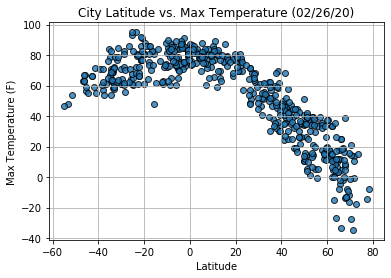

In [9]:
# Build scatter plot for Latitude vs. Temperature Plot
plt.scatter (lat, max_temps,
             edgecolor ="black", linewidth =1, marker ="o", alpha = 0.8 , label ="Cities")

#Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" %time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("output_data/Fig1.png")

#Show plot
plt.show()

#### Latitude vs. Humidity Plot

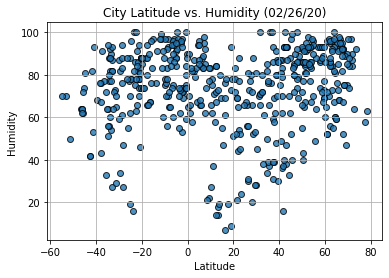

In [10]:
# Build scatter plot for Latitude vs. Humidity Plot
plt.scatter (lat,
             humidity,
             edgecolor ="black", linewidth =1, marker ="o", alpha = 0.8 , label ="Cities")

#Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" %time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("output_data/Fig2.png")

#Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

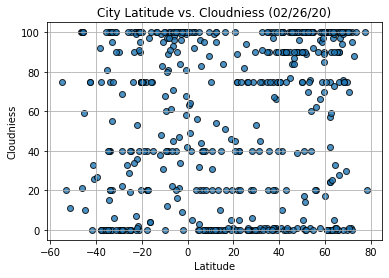

In [11]:
# Build scatter plot for Latitude vs. Cloudniness Plot
plt.scatter (lat,
             cloudiness,
             edgecolor ="black", linewidth =1, marker ="o", alpha = 0.8 , label ="Cities")

#Incorporate the other graph properties
plt.title("City Latitude vs. Cloudniess (%s)" %time.strftime("%x"))
plt.ylabel("Cloudniess")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("output_data/Fig3.png")

#Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

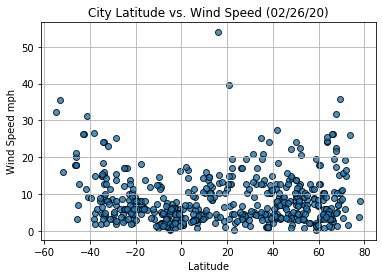

In [12]:
# Build scatter plot for Latitude vs. Cloudniness Plot
plt.scatter (lat,
             wind_speed,
             edgecolor ="black", linewidth =1, marker ="o", alpha = 0.8 , label ="Cities")

#Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" %time.strftime("%x"))
plt.ylabel("Wind Speed mph")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("output_data/Fig4.png")

#Show plot
plt.show()

# Linear Regression 

In [67]:
#optional: Creat a function to create lineat Regress polts

def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    #Run regression on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr)= linear_regression(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y ="+ str(round(slope,2)) +"X +" + str(round(intercept,2))
    
    #plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values,"r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("title")
    print(f"The r-square is : {rvalue}")
    plt.show()
    
    

In [68]:
#create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


# Nothern Hemisphere -Max Temp vs Latitude Linear Rgression 

In [70]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(6,30))

# Southern Hemisphere -Max Temp vs Latitude Linear Rgression 

In [57]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(-30,40))

#  Northern Hemisphere -Humidity(%) vs Latitude Linear Rgression

In [58]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(40,10))

# Southern Hemisphere -Humidity(%) vs Latitude Linear Rgression 

In [ ]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(-30,150))

# Northern Hemisphere -Cloudiness (%) vs Latitude Linear Rgression

In [ ]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness",(40,10))

# Southern Hemisphere -Cloudiness(%) vs Latitude Linear Rgression

In [ ]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness",(-30,30))

#  Northern Hemisphere -Wind Speed (mph) vs Latitude Linear Rgression

In [ ]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "WInd Speed",(40,25))

# Southern Hemisphere -Wind Speed (mph) vs Latitude Linear Rgression

In [ ]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed",(-30,30))